# Homework Assignment 4

Student: Weiyi Chen, weiyi.chen@baruchmail.cuny.edu

## Problem 1

You’ve constructed a model to classify profitable vs. unprofitable trades on price series data that show an a priori (pre-classification) ratio of profitable vs. unprofitable opportunities given by

$$ \frac{\text{# Profitable Trades}}{\text{# Unprofitable Trades}} \equiv H $$

Show that, in order to be profitable, your classifier must lie in the region bounded from below by the line 

$$ y = (\frac{1}{2H} \frac{L}{P}) x + \frac{1}{2} $$

in the ROC plane. More specifically, in a liquidity-providing HFT strategy, the loss-to-profit ratio of a trade is typically given by

$$ \frac{L}{P} = \frac{1+2c}{1-2c} $$

where $c$ is the transaction cost in units of cents, so that

$$ \frac{L}{P} \cong 3 $$

while the ratio of a priori profitable vs. unprofitable trades is of the order of 0.5. Plot the region in ROC space corresponding to the viable classifiers for this strategy.

### Solution

For a point $(x,y) = (fp, tp)$ on the ROC plane, the profitable points are such that

$$ (TP − FN) \cdot P > FP \cdot L $$

where 

$$TP = \text{# Profitable Trades} \cdot tp \\ 
FN = \text{# Profitable Trades} \cdot (1−tp) \\ 
FP = \text{# Unprofitable Trades} \cdot fp
$$

Plugging in $H$, we have

$$ tp > (\frac{1}{2H} \frac{L}{P}) fp + \frac{1}{2} \mbox{ or } y > (\frac{1}{2H} \frac{L}{P}) x + \frac{1}{2}$$

that is, in order to be profitable, the classifier must lie in the region bounded from below by the line. When 

$$ \frac{L}{P} \cong 3, H \cong 0.5 $$

We derive $y > 3x + 0.5$. The green line below is the viable classifiers for this strategy.

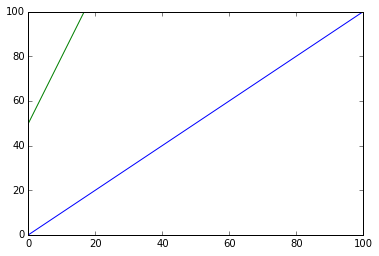

In [10]:
# Plot the region in ROC space corresponding to the viable classifiers for this strategy.

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0,100,100)
Y = [3*x+50 for x in X]

plt.plot(X,X) # Random
plt.plot(X,Y) # This strategy
plt.xlim([0,100])
plt.ylim([0,100])
plt.show()

## Problem 2

You’re searching for Association Rules in a transaction database with 1,000,000 transactions, but this time your algorithm is using the Dependency Framework. You’ve decided to use Minterm Support of 􏰐$s = 5$ at the $p􏱝 = 80\%$ level, and a 􏲃􏰔$\chi^2$ Significance Level of 􏲄$\alpha = 0.05$ (i.e., a 95% Confidence Level). You’re considering Itemsets $X$􏱣 and $Y$􏰹 and have measured the following occurrences in the database: Number of occurrences of 􏱣$X$ is 500,000; $Y$􏰹 occurs 400,000 times. 

- (a) Assuming that $X$􏱣 and $Y$ occur together 200,000 times, what is the Minterm Support? Does it clear the Minterm Support threshold? 
- (b) Compute the 􏲃􏰔$\chi^2$ Statistic, and notice that it does not clear the Significance Level. 
- (c) Based on your answers to (a) and (b) is this an Interesting Association Rule according to the Dependency Framework? Discuss whether this is a good idea and contrast with your answer to 5.(c) in Homework Assignment 3 from last week. 

Now suppose that $X$􏱣 and $Y$􏰹 occur together only 2,000 times. 

- (d) What is the Minterm Support? Does it clear the Minterm Support Threshold? 
- (e) Compute the $\chi^2$􏲃􏰔 Statistic, and notice that it does clear the Significance Level (alternatively you could look up this value in a table for a 􏲃􏰔 Statistic with degree of freedom = 1). 
- (f) Based on the answers to (d) and (e), and assuming the Dependency Strength is high enough, is this an Interesting Association Rule according to the Dependency Framework? Discuss whether this is a good idea and contrast with your answer to 5.(f) from Homework Assignment 3.

### Solution

#### (a) Minterm Support

an Itemset 􏱣$X$ has Minterm Support $s$􏰐 at the 􏱝$p\%$ level if:

- No Minterm of $X$ has expected value less than $1$
- At least $p\%$ of the Minterms of $X$ have expected value no less than $s$

In our case, the minterms of $X$ and $Y$ are: $XY, \bar{X}Y, X\bar{Y}, \bar{X}\bar{Y}$, their expected value could be represented by their observed value, that is

\begin{align}
O(XY) &= 200,000 \\
O(\bar{X}Y) &= O(Y) - O(XY) = 200,000 \\
O(X\bar{Y}) &= O(X) - O(XY) = 300,000 \\
O(\bar{X}\bar{Y}) &= 1,000,000 - (O(X) + O(Y) - O(XY)) = 300,000
\end{align}

Obviously none of them has expected value less than $1$ and all the minterms have expected value no less than $s=5$. It clears the Minterm Support Threshold.

#### (b) $\chi^2$ statistic

The $\chi^2$ statistic is computed as

$$ \chi^2 = \sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i} = 0 $$

as we used observed value for expected value, hence

$$ \chi^2 = 0 < \chi_1^2(.95) = 3.84 $$

It does not clear the significance level at $5\%$.

#### (c) Conclusion

This is not an interesting Association Rule. This is a good idea compared to the answer to 5.(c) in Homework Assignment 3 from last week, as the Support-Confidence Framework treated the result as an interesting Associate Rule, which is incorrect.

#### (d) Mintern Support

Similar to (a), the expected values of minterms of $X$ and $Y$ are are

\begin{align}
O(XY) &= 2,000 \\
O(\bar{X}Y) &= O(Y) - O(XY) = 398,000 \\
O(X\bar{Y}) &= O(X) - O(XY) = 498,000 \\
O(\bar{X}\bar{Y}) &= 1,000,000 - (O(X) + O(Y) - O(XY)) = 102,000
\end{align}

Obviously none of them has expected value less than $1$ and all the minterms have expected value no less than $s=5$. It clears the Minterm Support Threshold.

#### (e) $\chi^2$ statistic

The $\chi^2$ statistic is computed as

$$ \chi^2 = \sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i} = 653400 > \chi_1^2(.95) = 3.84 $$

It clears the significance level at $5\%$.

#### (f) Conclusion

Assuming the Dependency Strength is high enough, this is an Interesting Association Rule according to the Dependency Framework. It is an good idea compared to 5.(f) in Homework Assignment 3 from last wekk, as the Support-Confidence Framework was unable to figure it out.

## Problem 3

What is the Region of Interest and how is it generated? In the Dependency Framework, why is the Dependency Strength Coefficient $U$ not used for generating the Region of Interest? Given the same database 􏲐$\mathcal{D}$, would you expect the Region of Interest to be smaller or larger for the Dependency Framework as compared with the Support-Confidence Framework? Discuss.

### Solution

#### Region of Interest

The External Closure of the $\chi^2$􏲃􏰔 statistic taken together with the Internal Closure of Minterm Support define the *Region of Interest* for the correctly stated Association Rules Problem using the Dependency Framework; i.e., *the reduced search space for Interesting Dependence Rules*.

To illustrate the Region of Interest, let $\Sigma$ be the set of all Minterm Supported Itemsets in $\mathcal{I}$, and $\Delta$ be the set of all Dependent Itemsets at the $1-\alpha$􏲣 􏲄 Confidence Level, which are supersets of Minterm Supported 2-Itemsets. The Region of Interest is simply the intersection of $\Sigma$ and $\Delta$.

#### Dependency Strength Coefficient

Note that the Dependency Strength Coefficient has no Closure property and thus cannot be used for pruning the search except until the very end.

#### Dependency Framework vs. Support-Confidence Framework

The relationship between the size of the Region of Interest for these two Frameworks is unclear. Dependency former has internal closure of Minterm Support and external closure of the $\chi^2$ statistic. The Support-Confidence has internal closure of Support and external support of Confidence. It's unclear which one would be larger.

## Problem 4

You’re searching for Association Rules in a very large transactional database, and you’ve decided to use sampling to reduce the computation time. However, you do not want the probability that your support error exceed 0.1% to be more than 0.01. What should your sample size be?

### Solution

If 􏰚􏲚$m_s$ is chosen such that

$$ m_s \ge \frac{1}{2\epsilon^2} \ln(\frac{2}{\delta}) $$

then $P(\epsilon(X,m_S) > \epsilon) \le \delta$.

In our case, let $\delta = 0.01, \epsilon = 0.1\%$, then

$$ m_s \ge \frac{1}{2\epsilon^2} \ln(\frac{2}{\delta}) = 2649159.$$

In [14]:
import math
epsilon = 0.1 / 100
delta = 0.01
print(1/(2*epsilon**2) * math.log(2/delta))

2649158.68327


## Problem 5

Within the classical Support-Confidence Framework for finding Association Rules, prove that Support is Internally Closed. If you find an Itemset that is not supported, how can we use this property (along with Closure Complementarity) to prune the search space? Is Support a Type I or a Type II Property? Why?

### Solution

#### Internal Closure of Support

To see this, let $X$ be a $k$-itemset with Support property, and consider, without loss of generality, a $(k-1)$-itemset $Y \subset X$, we must show that $Y$ is also with Support property. To show this, note that $P(Y) \ge P(X)$ for sure because $Y$ is a subset of $X$, we then have $P(Y) \ge P(X) \ge s$, satisfies the Support property.

If we find an Itemset that is not supported, all its super-itemsets are not supported according to contrapositive statement of the lemma above.

Support is a Type I Property because it is non-decreasing in the number of transactions that contain $X$.

## Problem 6

The Dependency Framework uses the significance level $\alpha$ to find Interesting Association Rules, but ignores $\beta$. Suppose that you have obtained a set of Dependency-Framework Association Rules using a given $\alpha \ll 1$􏲄, and that you have estimated $\beta$ using a non-central $\chi^2$􏲃􏰔 distribution. Suppose, further, that you have estimated the Association Rules’ True Positive Rate as $1-\alpha$􏲄, and that the loss incurred by an incorrectly assumed actionable for your Dependency Framework is $L$, while the benefit obtained by a correct actionable is $P$. What would be the minimum power for your Framework to be profitable?

### Solution

<img src="POWER.png" width=300px>

To guarantee the Framework profitable, 

$$ \frac{TP - FN}{FP} > \frac{L}{P} $$

According to the graph above (from page 36 of lecture 4), $TP=1-\alpha, FP=\alpha, FN=\beta$, we are able to derive

$$ 1 - \beta > \frac{P+L}{P} \alpha $$

where the right part is the minimum power for our Framework to be profitable.

## Problem 7

An ANN with a Tapped-Delay Line with $d$ delays is used as a predictor for a time series 􏰊􏱎$y_t$. Assuming that the network has a sufficient number of hidden nodes, and that you’ve adequately regularized the network and used techniques such as early stopping to avoid overfitting, what would be the advantage of using such a network to model the series 􏰊􏱎$y_t$ over using an Autoregression of the form

$$ y_t = \sum_{k=1}^d \phi_k y_{t-k} $$

where the $\phi_i$ are obtained through linear regression.

### Solution

Using an Autoregression of the form

$$ y_t = \sum_{k=1}^d \phi_k y_{t-k} $$

we can only build a linear autoregression (AR) time series. We can use ANNs to approximate a time series by treating the time series as a single input pattern, but introducing Delays ($\mathbf{D}$) via a Tapped Delay Line:

<img src='TDL.png' width=300px>

This shows a TDL with N delays feeding into a single ADALINE, which can be used for approximating linear autoregressive (AR) time series.

However if we use dynamic ANNs in Recurrent Networks, the output is fed back into the input via a TDL:

<img src="Dynamic_ANN.png" width=400px>

Note that the inputs can include the output series $y_t$􏲴􏰓 itself, and/or a “Companion” or “Regressor” series 􏲵􏰓$x_t$. This can approximate a more general (possibly non-linear) series:

$$ 􏲴y_t = f(y_{t-1}, y_{t-2}, ..., y_{t-m}, x_{t-1}, x_{t-2}, ..., x_{t-n}) $$

where 􏱉$f$ is the (possibly non-linear) function to be approximated.